In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

[0.00057627 0.00248433 0.07195629]


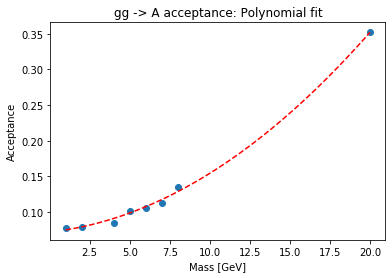

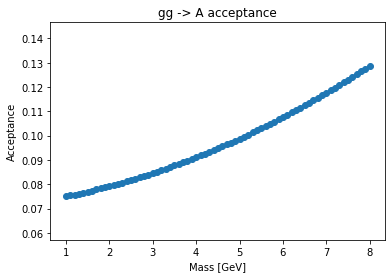

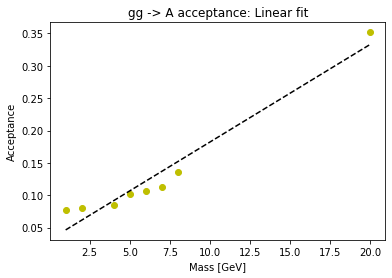

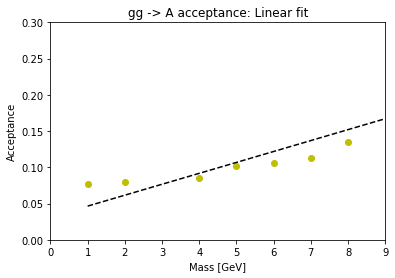

<Figure size 432x288 with 0 Axes>

In [2]:
# ACCEPTANCE
# Checked linear fit

mass = np.array([1., 2., 4., 5., 6., 7., 8., 20.])
acc_amumu = np.array([0.0774, 0.0798, 0.0847, 0.1017, 0.1061, 0.1132, 0.1355, 0.3518])
#v_acc = [(1., 0.0774), (2., 0.0798), (4., 0.0847), (5., 0.1017), (6., 0.1061), (7., 0.1132), (8., 0.1355), (20., 0.3518)]
#v_acc_x = [x[0] for x in v_acc]
#v_acc_y = [x[1] for x in v_acc]
#plt.plot(v_acc_x, v_acc_y)
#plt.scatter(v_acc_x, v_acc_y)
#plt.plot(mass, acc_amumu)

p = polyfit(mass, acc_amumu, 2)
print(p)
x1 = linspace(1,20)
f1 = polyval(p,x1)
plt.plot(mass, acc_amumu, 'o')
plt.plot(x1,f1,'r--')
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Polynomial fit')
plt.show()
plt.savefig('ggA_acceptance_pol2.pdf')
plt.savefig('ggA_acceptance_pol2.png')

f_acc_amumu = np.poly1d(p)
#print(np.poly1d(f_acc_amumu))
v_acc_amumu = []
for i in np.arange(start=1, stop=8.1, step=0.1):
    v_acc_amumu.append(f_acc_amumu(i))
#print(v_acc_amumu)

v_mass = []
v_mass = np.arange(start=1, stop=8.1, step=0.1)
#print(v_mass)

#plt.plot(v_mass, v_acc_amumu)
plt.scatter(v_mass, v_acc_amumu)
plt.plot(v_mass, v_acc_amumu)
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance')
plt.show()
plt.savefig('ggA_acceptance_tot.pdf')
plt.savefig('ggA_acceptance_tot.png')

m,q = np.polyfit(mass, acc_amumu, 1) 
plt.plot(mass, acc_amumu, 'yo', mass, m*mass+q, '--k') 
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Linear fit')
plt.show()
plt.savefig('ggA_acceptance_lin.pdf')
plt.savefig('ggA_acceptance_lin.png')

coef = np.polyfit(mass, acc_amumu, 1)
poly1d_fn = np.poly1d(coef) 
plt.xlim(0, 9)
plt.ylim(0, 0.3)
plt.xlabel('Mass [GeV]')
plt.ylabel('Acceptance')
plt.title('gg -> A acceptance: Linear fit')
plt.plot(mass, acc_amumu, 'yo', mass, poly1d_fn(mass), '--k')
plt.show()
plt.savefig('ggA_acceptance_lin_red.pdf')
plt.savefig('ggA_acceptance_lin_red.png')

In [3]:
# BRANCHING RATIO

br_amumu = np.array([0.021105, 0.026048, 0.002397, 0.002415, 0.001905, 0.001802, 0.001778, 0.001244])
v_br = []

f_br = np.loadtxt("./BR_IV_tgBeta05_reduced.txt", delimiter = "\t")
#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_br)):
    v_br.append(round(f_br[i][1], 5))

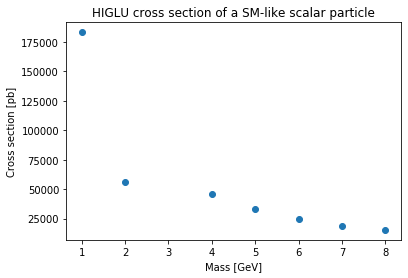

<Figure size 432x288 with 0 Axes>

In [8]:
# CROSS SECTION

# Philip's Python Interface
#xsec_higlu_1 = [ 34950.2, 25042.8, 15118.9, 14845.8, 14620.2, 13521.5, 13100.8, 11115.4, 9126.8, 7702.1, 6750.3, 1998.8 ]

# HiGLU standalone
mass_red = np.array([1., 2., 4., 5., 6., 7., 8.])
#xsec_higlu_1 = np.array([183357., 55940.7, 45607.8, 32940.1, 24445.4, 18944.6, 15327.4, 3674.1])
xsec_higlu_1 = np.array([183357., 55940.7, 45607.8, 32940.1, 24445.4, 18944.6, 15327.4])

#p_xsec = polyfit(mass_red, xsec_higlu_1, 5)
#print(p_xsec)
#x_xsec = linspace(1,8)
#f_xsec = polyval(p_xsec, x_xsec)
##plt.plot(mass_red, xsec_higlu_1, 'o')
#plt.plot(x_xsec, f_xsec, 'r--')

#log_y_xsec = np.log(xsec_higlu_1)
#curve_fit = np.polyfit(mass_red, log_y_xsec, 2)
#print(curve_fit)
#y = np.exp(11.42584343) * np.exp(-0.1778358*mass)
#plt.plot(mass, xsec_higlu_1, "o")
#plt.plot(mass, y)

plt.scatter(mass_red, xsec_higlu_1)
#plt.plot(mass, 286080.7*exp(-0.54513*mass), '--k') 
plt.xlabel('Mass [GeV]')
plt.ylabel('Cross section [pb]')
plt.title("HIGLU cross section of a SM-like scalar particle")
plt.show()
plt.savefig('xsec_red.pdf')
plt.savefig('xsec_red.png')

In [9]:
# Philip's Python Interface
#xsec_higlu = [ 2511328.7, 139253.3, 15513.9, 13478.7, 13099.4, 11397.9, 10983.1, 9826.4, 8308.8, 7309.3, 6612.4, 1998.8 ]

#xsec_higlu = np.array([187189000, 70218.5, 41759.7, 31963.1, 24611.6, 19677.9, 16289.3, 4140.2])
xsec_higlu = np.array([187189000, 70218.5, 41759.7, 31963.1, 24611.6, 19677.9, 16289.3])


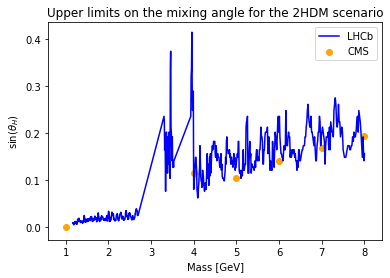

[0.00041, 0.01992, 0.11524, 0.10418, 0.14007, 0.16801, 0.19387]

<Figure size 432x288 with 0 Axes>

In [16]:
#Observed cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. Validation: mS = 20 GeV

#obs_limit = [ 0.139, 0.159, 0.210, 0.196, 0.196, 0.138, 0.154, 0.172, 0.212, 0.15 ]
obs_limit = [ 0.0503, 0.0579, 0.1126, 0.0852, 0.0976, 0.1133, 0.1475]
#obs_limit = [ 0.0503, 0.0579, 0.1126, 0.0852, 0.0976, 0.1133, 0.1475, 0.15 ]
  
senTheta_limit = []
senTheta_limit_1 = []

for x in range(7):  
    senTheta = math.sqrt(obs_limit[x] / (xsec_higlu[x] * br_amumu[x] * acc_amumu[x]))
    senTheta_limit.append(round(senTheta,5))

#f_BaBar = np.loadtxt("./BaBar_limits.txt", delimiter = "\t")
#v_lim_BaBar = []
#v_mass_BaBar = []
#for i in range(len(f_BaBar)):
#    v_mass_BaBar.append(f_BaBar[i][0])
#    v_lim_BaBar.append(f_BaBar[i][1])

f_LHCb = np.loadtxt("./LHCb_limits.txt", delimiter = " ")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000)
    v_lim_LHCb.append(f_LHCb[i][1])
    
#plt.plot(v_mass_BaBar, v_lim_BaBar, color="red", label = "BaBar")
plt.plot(v_mass_LHCb, v_lim_LHCb, color="blue", label = "LHCb")
plt.scatter(mass_red, senTheta_limit, color="orange", label = "CMS")
plt.xlabel('Mass [GeV]')
plt.ylabel('sin($\\theta_{H}$)')
plt.title("Upper limits on the mixing angle for the 2HDM scenario")
plt.legend()
plt.show()
plt.savefig('senTheta_CMS_LHCB.pdf')
plt.savefig('senTheta_CMS_LHCB.png')
    
senTheta_limit



In [ ]:
for x in range(7):  
    senTheta_1 = math.sqrt(obs_limit[x] / (xsec_higlu_1[x] * br_amumu[x] * acc_amumu[x]))
    senTheta_limit_1.append(round(senTheta_1,5))

senTheta_limit_1